# Chapter03 2次元データの整理

- 3.1 2つのデータの関係性の指標
- 3.2 2次元データの視覚化
- 3.3 アンスコムの例

In [199]:
# ライブラリーの準備
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from plot_util import plot_cov_interact

%precision 3
pd.set_option('display.precision', 3)
%matplotlib inline

In [200]:
# データの準備
df = pd.read_csv('../data/ch2_scores_em.csv', index_col='生徒番号')
df.head()

,英語,数学
生徒番号,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [201]:
# arrayとDataFrameの作成
en_scores = np.array(df['英語'])[:10]
ma_scores = np.array(df['数学'])[:10]

scores_df = pd.DataFrame(
    {'english': en_scores, 'math': ma_scores},
    index=pd.Index(['A', 'B', 'C', 'D','E', 'F', 'G', 'H', 'I', 'J'], name='students')
)
scores_df

,english,math
students,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


## 3.1 2つのデータの関係性の指標

- 散布図（scatter plot）
- 共分散（covariance）

In [202]:
# 点数の散布図と符号付き面積
plot_cov_interact(en_scores, ma_scores)

interactive(children=(IntSlider(value=42, description='Aさんの英語'), IntSlider(value=65, description='Aさんの数学'), In…

In [203]:
# 共分散の計算
summary_df = scores_df.copy()
summary_df['en_dev'] = summary_df['english'] - summary_df['english'].mean()
summary_df['ma_dev'] = summary_df['math'] - summary_df['math'].mean()
summary_df['dev_prod'] = summary_df['en_dev'] * summary_df['ma_dev']

summary_df

,english,math,en_dev,ma_dev,dev_prod
students,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [204]:
# 偏差の積の平均
summary_df['dev_prod'].mean()

62.800

- 共分散 $ S_{xy} = \dfrac{1}{n} \displaystyle\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}) $
- Numpyの共分散
  - cov()関数で求める
  - 返り値は、
    - 共分散行列（covariance matrix）
    - 分散共分散行列（variance-covariance matrix）
  - と呼ばれる行列

In [205]:
cov_mat = np.cov(en_scores, ma_scores, ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [206]:
# 英語と数学の共分散
cov_mat[0, 1], cov_mat[1, 0]

(62.800, 62.800)

In [207]:
# 英語の分散と数学の分散
cov_mat[0, 0], cov_mat[1, 1]

(86.000, 68.440)

In [208]:
# 英語の分散と数学の分散
np.var(en_scores, ddof=0), np.var(ma_scores, ddof=0)

(86.000, 68.440)

### 3.1.2 相関係数

- 共分散 $ S_{xy} = \dfrac{1}{n} \displaystyle\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}) $
- 相関係数（correlation coefficient）$ r_{xy} $

$$ r_{xy} = \dfrac{S_{xy}}{S_x S_y}
          = \dfrac{1}{n} \displaystyle\sum_{i=1}^n (\dfrac{x_i - \bar{x}}{S_x})(\dfrac{y_i - \bar{y}}{S_y})
$$

In [209]:
# 英語と数学の相関係数
np.cov(en_scores, ma_scores, ddof=0)[0, 1] / \
    (np.std(en_scores, ddof=0) * np.std(ma_scores, ddof=0))

0.819

- Numpyの相関係数
  - correcoef()関数
  - 返り値は、
    - 相関行列（correlation matrix）
  - と呼ばれる行列

In [210]:
# 英語と数学の相関係数
np.corrcoef(en_scores, ma_scores)

array([[1.   , 0.819],
       [0.819, 1.   ]])

In [211]:
# DataFrameでの相関係数
# corr()メソッドで求める
scores_df.corr()

,english,math
english,1.000,0.819
math,0.819,1.000


## 3.2 2次元データの視覚化

### 3.2.1 散布図

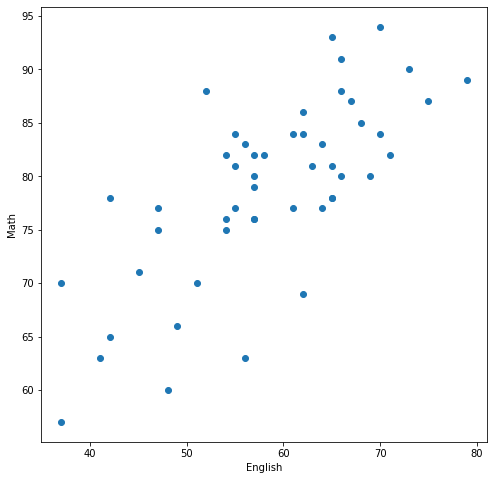

In [212]:
# Matplotlibのscatter()メソッドで、散布図を描画する
english_scores = np.array(df['英語'])
math_scores = np.array(df['数学'])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

ax.scatter(english_scores, math_scores)

ax.set_xlabel('English')
ax.set_ylabel('Math')

plt.show()


### 3.2.2 回帰直線（regression line）

- 回帰直線 $ y = \beta_0 + \beta_1 x $

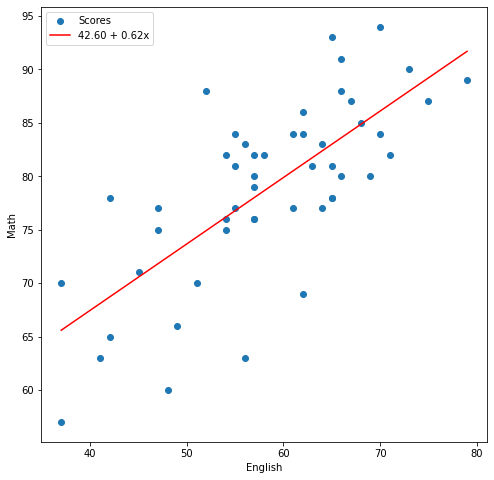

In [214]:
# Numpy.polyfit()関数とNumpy.poly1d()関数を使って
# 回帰直線を求める

# 係数β_0とβ_1を求める
poly_fit = np.polyfit(english_scores, math_scores, 1)

# β_0 + β_1 * x を返す関数を作成する
poly_1d = np.poly1d(poly_fit)

# 直線を描画するためにx座標を作成する
xs = np.linspace(english_scores.min(), english_scores.max())

# xsに対応するy座標を求める
ys = poly_1d(xs)

# グラフの描画
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)


ax.set_xlabel('English')
ax.set_ylabel('Math')

ax.scatter(english_scores, math_scores, label='Scores')
ax.plot(xs, ys, color='red', label=f"{poly_fit[1]:.2f} + {poly_fit[0]:.2f}x")

# 凡例の表示
ax.legend(loc='upper left')

plt.show()


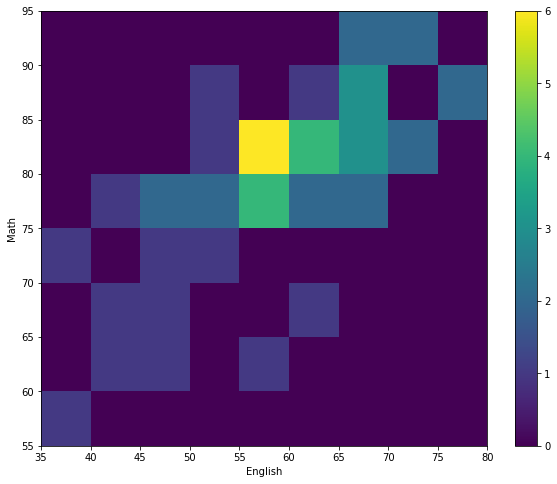

In [221]:
# ヒートマップ

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.hist2d(english_scores, math_scores, bins=[9, 8], range=[(35, 80), (55, 95)])
ax.set_xticks(c[1])
ax.set_yticks(c[2])

ax.set_xlabel('English')
ax.set_ylabel('Math')

# カラーバーの表示
fig.colorbar(c[3], ax=ax)

plt.show()

## 3.3 アンスコムの例

- 同じ指標を持っているが、まったく異なるデータという例

In [224]:
# npy形式で保存されたNumpy arrayを読み込む
# 大きさ:11の2次元データ
anscombe_data = np.load('../data/ch3_anscombe.npy')
print(anscombe_data.shape)
anscombe_data[0]

(4, 11, 2)


array([[10.  ,  8.04],
       [ 8.  ,  6.95],
       [13.  ,  7.58],
       [ 9.  ,  8.81],
       [11.  ,  8.33],
       [14.  ,  9.96],
       [ 6.  ,  7.24],
       [ 4.  ,  4.26],
       [12.  , 10.84],
       [ 7.  ,  4.82],
       [ 5.  ,  5.68]])

In [226]:
# 各データの平均・分散・相関係数・回帰直線を求め、DataFrameにまとめる
stats_df = pd.DataFrame(
    index=['Xの平均', 'Xの分散',
           'Yの平均', 'Yの分散',
           'XとYの相関係数', 'XとYの回帰直線'
    ]
)

for i, data in enumerate(anscombe_data):
    data_x = data[:, 0]
    data_y = data[:, 1]
    poly_fit = np.polyfit(data_x, data_y, 1)
    stats_df[f"data{i+1}"] = [
        f"{np.mean(data_x):.2f}",
        f"{np.var(data_x):.2f}",
        f"{np.mean(data_y):.2f}",
        f"{np.var(data_y):.2f}",
        f"{np.corrcoef(data_x, data_y)[0, 1]:.2f}",
        f"{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x"
    ]
stats_df

,data1,data2,data3,data4
Xの平均,9.00,9.00,9.00,9.00
Xの分散,10.00,10.00,10.00,10.00
Yの平均,7.50,7.50,7.50,7.50
Yの分散,3.75,3.75,3.75,3.75
XとYの相関係数,0.82,0.82,0.82,0.82
XとYの回帰直線,3.00+0.50x,3.00+0.50x,3.00+0.50x,3.00+0.50x


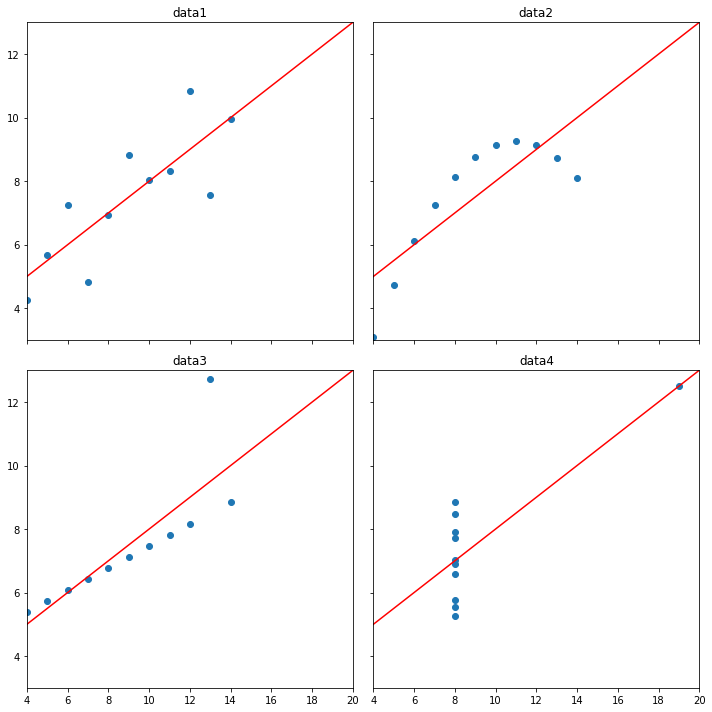

In [227]:
# グラフを描画する領域を2x2個作成する
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10 ,10), sharex=True, sharey=True)

xs = np.linspace(0, 30, 100)
for i, data in enumerate(anscombe_data):
    poly_fit = np.polyfit(data[:, 0], data[:, 1], 1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)

    # 描画する領域の選択
    ax = axes[i//2, i%2]
    ax.set_xlim([4, 20])
    ax.set_ylim([3, 13])

    # タイトルを付ける
    ax.set_title(f"data{i+1}")
    ax.scatter(data[:, 0], data[:, 1])
    ax.plot(xs, ys, color='red')

# グラフ同士の間隔を狭くする
plt.tight_layout()
plt.show()